In [1]:
#Könyvtárak beimportálása
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
# Az .pgn fájl elérési útvonala
file_path = 'chessdata.pgn'

In [3]:
# Az adatok inicializálása üres listákkal
dates = []
colors = []
moves = []
scores = []
whiteranks = []
blackranks = []

In [4]:
# Az .pgn fájl beolvasása és feldolgozása
with open(file_path, 'r') as f:
    game = ''
    for line in f:
        if line.startswith('[Date '):
            dates.append(line.split('"')[1])
        elif line.startswith('[White "cserbalin"]'):
            colors.append('white')
        elif line.startswith('[Black "cserbalin"]'):
            colors.append('black')
        elif line.startswith('1.'):
            game += line.strip() + ' '
        elif line.startswith('[Result '):
            scores.append(line.split('"')[1])
        elif line.startswith('[WhiteElo'):
            whiteranks.append(int(line.split('"')[1]))
        elif line.startswith('[BlackElo'):
            blackranks.append(int(line.split('"')[1]))
            moves.append(game)
            game = ''
       

In [5]:
# DataFrame létrehozása az adatokból
df = pd.DataFrame({'date': dates,
                   'color': colors,
                   'moves': moves,
                   'scores': scores,
                  'whiteranks' : whiteranks,
                  'blackranks' : blackranks})

In [6]:
# DataFrame rendezése dátum alapján
df = df.sort_values('date')
df = df.reset_index(drop=True)

In [7]:
# CSV fájlba írás
df.to_csv('mychessdata.csv', index=False)

In [8]:
# Egy sor egy játszma adatait tartalmazza.
# date: A sakkjátszma dátuma.
# color: A kezdőszínem.
# moves: Lépések
# scores: Eredmény white-black sorrendben
# whiteranks: Fehér játékos rangja
# blackranks: Fekete játékos rangja
df

,date,color,moves,scores,whiteranks,blackranks
0,2023.03.16,white,,0-1,169,311
1,2023.03.16,white,1. e4 Nc6 2. Qh5 e5 3. Nf3 d6 4. Nc3 Nf6 5. Qh...,1-0,324,241
2,2023.03.16,black,1. e4 e5 2. h4 Nf6 1-0,0-1,228,303
3,2023.03.16,white,1. e4 d5 2. exd5 Qxd5 3. d4 Qxd4 4. Qxd4 Nf6 5...,1-0,280,270
4,2023.03.16,white,1. f4 d5 2. Nf3 Nc6 3. b3 f6 4. Bb2 Ne5 5. Nxe...,0-1,226,297
...,...,...,...,...,...,...
285,2023.04.07,white,1. e4 e5 2. Nf3 Nc6 3. d4 exd4 4. Nxd4 Bc5 5. ...,1-0,520,528
286,2023.04.07,black,1. e4 e5 2. Nc3 Bc5 3. Bb5 Nf6 4. Nf3 O-O 5. O...,1-0,542,511
287,2023.04.07,white,1. d4 d5 2. e3 Nf6 3. Nf3 Ne4 4. Bd3 e6 5. c3 ...,0-1,511,504
288,2023.04.08,black,1. d4 d5 2. Bf4 Nc6 3. e3 Be6 4. c3 Nf6 5. Bd3...,0-1,411,517


In [9]:
#Sakk játszma ereményeim hozzáadása

In [10]:
def results(x):
    if x['scores'] == '1-0' and x['color'] == 'white':
        return 'win'
    elif x['scores'] == '1-0' and x['color'] == 'black':
        return 'lose'
    elif x['scores'] == '0-1' and x['color'] == 'white':
        return 'lose'
    elif x['scores'] == '0-1' and x['color'] == 'black':
        return 'win'
    else:
        return 'draw'
df['results'] = df.apply(results, axis = 1)

In [11]:
df

,date,color,moves,scores,whiteranks,blackranks,results
0,2023.03.16,white,,0-1,169,311,lose
1,2023.03.16,white,1. e4 Nc6 2. Qh5 e5 3. Nf3 d6 4. Nc3 Nf6 5. Qh...,1-0,324,241,win
2,2023.03.16,black,1. e4 e5 2. h4 Nf6 1-0,0-1,228,303,win
3,2023.03.16,white,1. e4 d5 2. exd5 Qxd5 3. d4 Qxd4 4. Qxd4 Nf6 5...,1-0,280,270,win
4,2023.03.16,white,1. f4 d5 2. Nf3 Nc6 3. b3 f6 4. Bb2 Ne5 5. Nxe...,0-1,226,297,lose
...,...,...,...,...,...,...,...
285,2023.04.07,white,1. e4 e5 2. Nf3 Nc6 3. d4 exd4 4. Nxd4 Bc5 5. ...,1-0,520,528,win
286,2023.04.07,black,1. e4 e5 2. Nc3 Bc5 3. Bb5 Nf6 4. Nf3 O-O 5. O...,1-0,542,511,lose
287,2023.04.07,white,1. d4 d5 2. e3 Nf6 3. Nf3 Ne4 4. Bd3 e6 5. c3 ...,0-1,511,504,lose
288,2023.04.08,black,1. d4 d5 2. Bf4 Nc6 3. e3 Be6 4. c3 Nf6 5. Bd3...,0-1,411,517,win


### Győzelmeim és vereségeim e4 e5 nyitás esetén

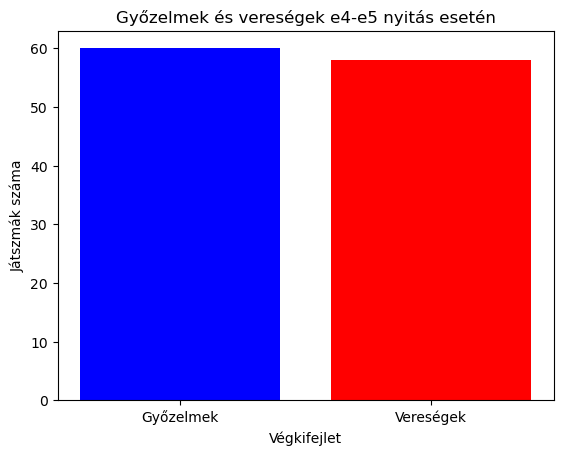

In [12]:
e4_e5_df = df[df['moves'].str.startswith('1. e4 e5')]

wins = e4_e5_df[e4_e5_df['results'] == 'win']
losses = e4_e5_df[e4_e5_df['results'] == 'lose']
wins['results'].count()
# Oszlopdiagram készítése
fig, ax = plt.subplots()
ax.bar(['Győzelmek', 'Vereségek'], [wins['results'].count(), losses['results'].count()],color=['blue','red'])

# Cím hozzáadása
ax.set_title('Győzelmek és vereségek e4-e5 nyitás esetén')
ax.set_xlabel('Végkifejlet')
ax.set_ylabel('Játszmák száma')

# Show the plot
plt.show()


In [13]:
def myranks(x):
    if x['color'] == 'white':
        return x['whiteranks']
    elif x['color'] == 'black':
        return x['blackranks']    
df['myranks'] = df.apply(myranks, axis = 1)
df

,date,color,moves,scores,whiteranks,blackranks,results,myranks
0,2023.03.16,white,,0-1,169,311,lose,169
1,2023.03.16,white,1. e4 Nc6 2. Qh5 e5 3. Nf3 d6 4. Nc3 Nf6 5. Qh...,1-0,324,241,win,324
2,2023.03.16,black,1. e4 e5 2. h4 Nf6 1-0,0-1,228,303,win,303
3,2023.03.16,white,1. e4 d5 2. exd5 Qxd5 3. d4 Qxd4 4. Qxd4 Nf6 5...,1-0,280,270,win,280
4,2023.03.16,white,1. f4 d5 2. Nf3 Nc6 3. b3 f6 4. Bb2 Ne5 5. Nxe...,0-1,226,297,lose,226
...,...,...,...,...,...,...,...,...
285,2023.04.07,white,1. e4 e5 2. Nf3 Nc6 3. d4 exd4 4. Nxd4 Bc5 5. ...,1-0,520,528,win,520
286,2023.04.07,black,1. e4 e5 2. Nc3 Bc5 3. Bb5 Nf6 4. Nf3 O-O 5. O...,1-0,542,511,lose,511
287,2023.04.07,white,1. d4 d5 2. e3 Nf6 3. Nf3 Ne4 4. Bd3 e6 5. c3 ...,0-1,511,504,lose,511
288,2023.04.08,black,1. d4 d5 2. Bf4 Nc6 3. e3 Be6 4. c3 Nf6 5. Bd3...,0-1,411,517,win,517


In [14]:
#Adatkeret csoportosítása dátum szerint, majd a rangok átlagának kiszámítása minden csoportra
df_avg = df.groupby('date')['myranks'].mean().reset_index()

### Játékon belüli rangom változása

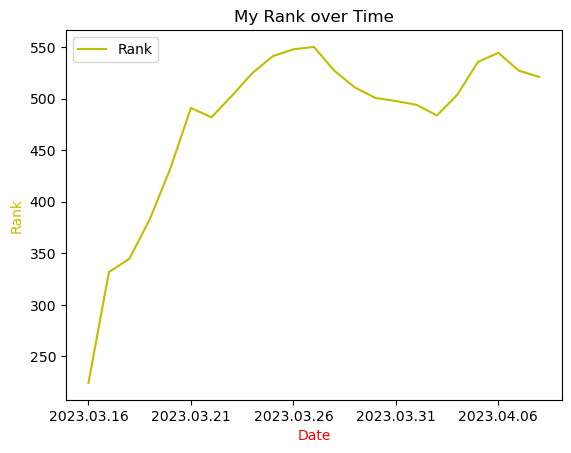

In [15]:
plt.title('My Rank over Time')

plt.plot(df_avg['date'], df_avg.myranks, label = 'Rank', color="y")
plt.xlabel('Date', color='r')
plt.ylabel('Rank', color="y")
plt.xticks(df_avg['date'][::5])
plt.legend()
plt.show()


### Leggyakoribb kezdőlépések fehérrel

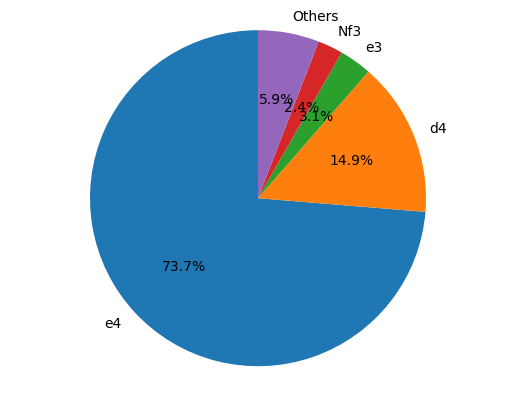

In [16]:
starting_moves = []
for moves in df.moves:
    match = re.search(r'^1\. ([a-zA-Z0-9\+#+=O-]+)(?:\s\d+\.\s([a-zA-Z0-9\+#+=O-]+))*', moves)
    if match:
        starting_moves.append(match.group(1))

# Minden kezdőlépés előfordulásánák megszámolása
counts = {}
for move in starting_moves:
    if move in counts:
        counts[move] += 1
    else:
        counts[move] = 1


# A top 4 kezdőlépés kigyűjtése
top_moves = sorted(counts.items(), key=lambda x: x[1], reverse=True)[:4]
other_count = sum(count for move, count in counts.items() if move not in [move for move, count in top_moves])
top_moves.append(('Others', other_count))

# Kördiagram elkészítése a top 4 lépésről
labels = [move[0] for move in top_moves]
values = [move[1] for move in top_moves]
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.show()
